In [1]:
library(tidyverse)
library(dplyr)
library(GGally)


── Attaching core tidyverse packages ─────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ───────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


: [1m[33mError[39m in `library()`:[22m
[33m![39m there is no package called ‘car’

In [21]:
wine_quality <- read_csv("data/winequality-red.csv")
sum(wine_quality$quality >= 7)

Rows: 1599 Columns: 12
── Column specification ───────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, tot...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 217

**No need for cleaning, since there are no N/A values in any columns**

In [6]:
colSums(is.na(wine_quality))

       fixed acidity     volatile acidity          citric acid       residual sugar            chlorides 
                   0                    0                    0                    0                    0 
 free sulfur dioxide total sulfur dioxide              density                   pH            sulphates 
                   0                    0                    0                    0                    0 
             alcohol              quality 
                   0                    0 

In [20]:
red_wine <- wine_quality %>% 
  mutate(quality = ifelse(quality >= 7, 1, 0))

sum(red_wine$quality == 1)

[1] 217

Ensure that the `quality` is consistent after mutating to binary in preparation of logistic regression 

## Initial EDA ##

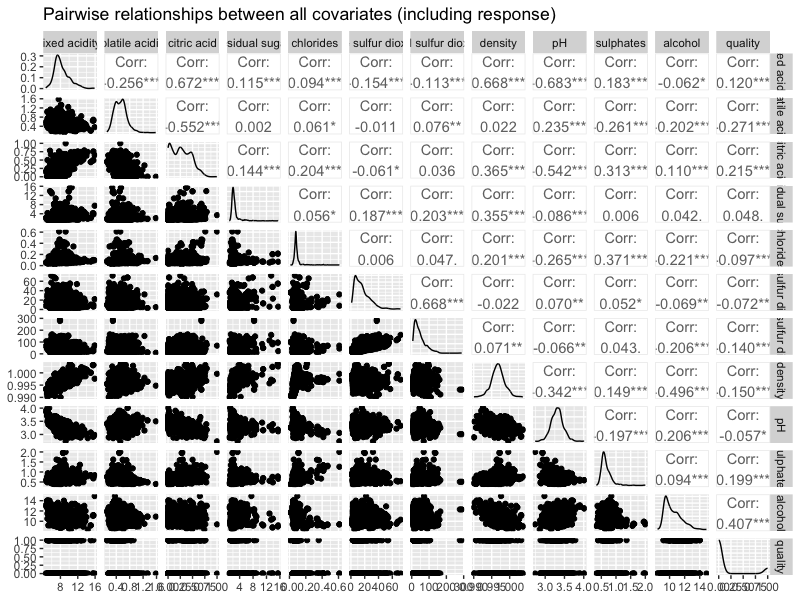

In [23]:
ggpairs(red_wine, title = "Pairwise relationships between all covariates (including response)")

*Note that all of the covariates are continous.*

Problematic covariate correlations: (>=|.5|)
- citric acid ~ fixed acidity
- density ~ fixed acidity
- pH ~ fixed acidity
- density ~ fixed acidity
- total sulfur dioxide ~ free sulfur dioxide
- citric acid ~ volatile acidity

**It seems that `fixed acidity` has high correlation with many of the other covariates which may suggest multicollinearity in the full fitted model, worth considering removing**